# Imports

In [102]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Analysis

## Data load

In [80]:
df = pd.read_csv('data_2019_2020.csv', index_col = 0)

In [81]:
df

,product_id,product_name,product_type,price_KIWI,price_MENY,price_OBS,price_REMA 1000,price_SPAR,price_EXTRA,year,week
0,174,Lime,kg,37.8,45.8,40.0,38.0,39.9,38.8,2019,1
1,231,Avocado Moden,2 pk,25.0,39.9,35.0,25.0,39.9,34.0,2019,1
2,123,Paprika,1 kg løsvekt,44.8,59.9,46.1,48.0,49.9,44.8,2019,1
3,6,Agurk,1 stk,13.0,18.9,20.5,13.8,13.9,19.9,2019,1
4,8,Brokkoli,1 stk,10.0,10.0,15.5,10.0,10.0,14.9,2019,1
...,...,...,...,...,...,...,...,...,...,...,...
31,467,Raspeballer Stangeland,1 kilo,35.9,38.9,36.6,45.9,38.9,35.9,2020,44
32,672,"Nescafe Gull, stor",200 gram,62.9,66.7,67.3,62.9,67.9,62.9,2020,44
33,447,OMO Color Refill,490 ml,39.9,42.9,42.3,39.9,42.9,39.9,2020,44
34,502,Omo Ultra Hvitt,"1,17 kg",53.9,58.9,56.0,53.9,57.9,53.9,2020,44


In [82]:
df.rename(columns={'price_REMA 1000': 'price_REMA'}, inplace = True)

In [83]:
df.columns

Index(['product_id', 'product_name', 'product_type', 'price_KIWI',
       'price_MENY', 'price_OBS', 'price_REMA', 'price_SPAR', 'price_EXTRA',
       'year', 'week'],
      dtype='object')

In [84]:
# to long
df = pd.wide_to_long(df, stubnames='price_', i = ['product_id', 'product_name', 'product_type','year', 'week'], j = 'banner', suffix ='\\w+').reset_index()

In [85]:
df

,product_id,product_name,product_type,year,week,banner,price_
0,174,Lime,kg,2019,1,KIWI,37.8
1,174,Lime,kg,2019,1,MENY,45.8
2,174,Lime,kg,2019,1,OBS,40.0
3,174,Lime,kg,2019,1,REMA,38.0
4,174,Lime,kg,2019,1,SPAR,39.9
...,...,...,...,...,...,...,...
20749,196,Freia Dronningsjokolade,100gr,2020,44,MENY,21.5
20750,196,Freia Dronningsjokolade,100gr,2020,44,OBS,20.3
20751,196,Freia Dronningsjokolade,100gr,2020,44,REMA,19.4
20752,196,Freia Dronningsjokolade,100gr,2020,44,SPAR,21.5


In [86]:
#unique identifier for date
df['week_year'] = df['year'].astype(str) + '_' + df['week'].astype(str)

In [87]:
df.dropna(axis = 0, inplace = True)

In [88]:
# Lower case
df['product_name'] = df['product_name'].str.lower()

In [91]:
#terms to include as mdlz product
mdlz_kws = ['freia', 'kvikk lunsj']

df['mdlz_product'] = df['product_name'].str.contains('|'.join(mdlz_kws))

In [108]:
df.to_csv('bannerprices_2019_2020_long.csv', sep = ',', index = False, encoding = 'utf-8')
df

,product_id,product_name,product_type,year,week,banner,price_,week_year,mdlz_product
0,174,lime,kg,2019,1,KIWI,37.8,2019_1,False
1,174,lime,kg,2019,1,MENY,45.8,2019_1,False
2,174,lime,kg,2019,1,OBS,40.0,2019_1,False
3,174,lime,kg,2019,1,REMA,38.0,2019_1,False
4,174,lime,kg,2019,1,SPAR,39.9,2019_1,False
...,...,...,...,...,...,...,...,...,...
20749,196,freia dronningsjokolade,100gr,2020,44,MENY,21.5,2020_44,True
20750,196,freia dronningsjokolade,100gr,2020,44,OBS,20.3,2020_44,True
20751,196,freia dronningsjokolade,100gr,2020,44,REMA,19.4,2020_44,True
20752,196,freia dronningsjokolade,100gr,2020,44,SPAR,21.5,2020_44,True


## Overview

In [94]:
#Weeks
df['week_year'].unique()

array(['2019_1', '2019_2', '2019_3', '2019_4', '2019_5', '2019_6',
       '2019_7', '2019_8', '2019_9', '2019_10', '2019_11', '2019_12',
       '2019_13', '2019_14', '2019_15', '2019_16', '2019_17', '2019_18',
       '2019_19', '2019_20', '2019_21', '2019_22', '2019_23', '2019_24',
       '2019_25', '2019_26', '2019_27', '2019_28', '2019_29', '2019_30',
       '2019_31', '2019_32', '2019_33', '2019_34', '2019_35', '2019_36',
       '2019_37', '2019_38', '2019_39', '2019_40', '2019_41', '2019_42',
       '2019_43', '2019_44', '2019_45', '2019_46', '2019_47', '2019_48',
       '2019_49', '2019_50', '2019_51', '2019_52', '2020_1', '2020_2',
       '2020_3', '2020_4', '2020_5', '2020_6', '2020_7', '2020_8',
       '2020_9', '2020_10', '2020_11', '2020_12', '2020_13', '2020_14',
       '2020_15', '2020_16', '2020_17', '2020_18', '2020_19', '2020_20',
       '2020_21', '2020_22', '2020_23', '2020_24', '2020_25', '2020_26',
       '2020_27', '2020_28', '2020_29', '2020_30', '2020_31', '2020_3

## Weekly basket total price by banner

In [96]:
df_week = df.groupby(['week_year', 'year', 'banner'])['price_'].sum().reset_index()

In [103]:
df_week

,week_year,year,banner,price_
0,2019_1,2019,EXTRA,992.75
1,2019_1,2019,KIWI,976.60
2,2019_1,2019,MENY,1078.30
3,2019_1,2019,OBS,1003.53
4,2019_1,2019,REMA,983.40
...,...,...,...,...
571,2020_9,2020,KIWI,824.90
572,2020_9,2020,MENY,889.90
573,2020_9,2020,OBS,843.61
574,2020_9,2020,REMA,828.90


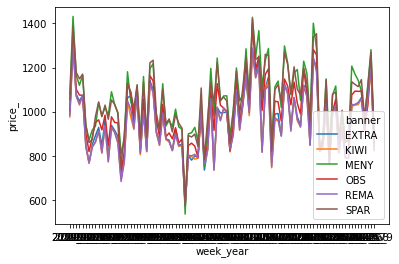

In [104]:
sns.lineplot(x = 'week_year', y = 'price_', hue = 'banner', data=df_week)

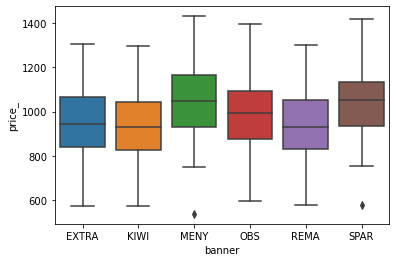

In [106]:
sns.boxplot(x = 'banner', y = 'price_', data = df_week)

In [101]:
df_week['price_']

0       992.75
1       976.60
2      1078.30
3      1003.53
4       983.40
        ...   
571     824.90
572     889.90
573     843.61
574     828.90
575     866.34
Name: price_, Length: 576, dtype: float64

In [98]:
#Mean basket price
df_week.groupby('banner').mean()

,year,price_
banner,,
EXTRA,2019.458333,957.126562
KIWI,2019.458333,946.386875
MENY,2019.458333,1052.540208
OBS,2019.458333,993.621667
REMA,2019.458333,949.255000
SPAR,2019.458333,1045.213125


In [61]:
#Mean basket price
df_week[df_week['year'] == 2019].groupby('banner').mean()

,year,price_
banner,,
EXTRA,2019,913.999423
KIWI,2019,902.919615
MENY,2019,1003.581538
OBS,2019,949.479808
REMA,2019,906.017500
SPAR,2019,1002.159423


In [15]:
#Mean basket price
df_week[df_week['year'] == 2020].groupby('banner').mean()

,year,price_
banner,,
EXTRA,2020,1007.365116
KIWI,2020,996.960930
MENY,2020,1109.655814
OBS,2020,1044.710000
REMA,2020,999.385349
SPAR,2020,1095.686047


In [16]:
# counnt where basket was cheapest
min_idx_slice = df_week.groupby('week_year')['price_'].idxmin()

df_week.loc[min_idx_slice]

,week_year,year,banner,price_
1,2019_1,2019,KIWI,976.60
7,2019_10,2019,KIWI,1297.83
13,2019_11,2019,KIWI,1070.70
19,2019_12,2019,KIWI,1030.32
25,2019_13,2019,KIWI,1072.80
...,...,...,...,...
541,2020_5,2020,KIWI,1057.30
547,2020_6,2020,KIWI,915.60
555,2020_7,2020,OBS,1030.18
559,2020_8,2020,KIWI,1195.87


In [17]:
df_week.loc[min_idx_slice].groupby('banner').agg({'week_year':'count',
                                                 'price_':'mean'})

,week_year,price_
banner,,
EXTRA,9,967.520000
KIWI,67,947.721642
MENY,1,537.190000
OBS,1,1030.180000
REMA,16,940.816250
SPAR,1,762.290000


## Freia ?

In [63]:
df

,product_id,product_name,product_type,year,week,banner,price_,week_year
0,174,Lime,kg,2019,1,KIWI,37.8,2019_1
1,174,Lime,kg,2019,1,MENY,45.8,2019_1
2,174,Lime,kg,2019,1,OBS,40.0,2019_1
3,174,Lime,kg,2019,1,REMA,38.0,2019_1
4,174,Lime,kg,2019,1,SPAR,39.9,2019_1
...,...,...,...,...,...,...,...,...
20749,196,Freia Dronningsjokolade,100gr,2020,44,MENY,21.5,2020_44
20750,196,Freia Dronningsjokolade,100gr,2020,44,OBS,20.3,2020_44
20751,196,Freia Dronningsjokolade,100gr,2020,44,REMA,19.4,2020_44
20752,196,Freia Dronningsjokolade,100gr,2020,44,SPAR,21.5,2020_44


In [64]:
# Lower case
df['product_name'] = df['product_name'].str.lower()

In [72]:
#terms to include as mdlz product
mdlz_kws = ['freia', 'kvikk lunsj']

df_mdlz = df[df['product_name'].str.contains('|'.join(mdlz_kws))]

In [73]:
df_mdlz['product_name'].unique()

array(['freia vaniljesukker 175 gr', 'kvikk lunsj', 'firkløver freia',
       'japp duo freia', 'jordbærgele, freia', 'bakepulver freia',
       'karamellsaus, freia', 'mandelstang freia', 'daim dobbel freia',
       'melkesjokolade freia', 'melkerull freia',
       'freia dronningsjokolade', 'freia regia kakao',
       'bringebærgele, freia', 'daim strøssel freia',
       'melkehjerter freia'], dtype=object)

In [74]:
df_mdlz_week = df_mdlz.groupby(['week_year', 'year', 'banner'])['price_'].sum().reset_index()

In [75]:
#Mean basket price
df_mdlz_week.groupby('banner').mean()

,year,price_
banner,,
EXTRA,2019.428571,50.519481
KIWI,2019.428571,49.697403
MENY,2019.428571,55.128052
OBS,2019.428571,52.031169
REMA,2019.428571,49.888312
SPAR,2019.428571,55.705195


In [76]:
# counnt where basket was cheapest
min_idx_slice = df_mdlz_week.groupby('week_year')['price_'].idxmin()

df_mdlz_week.loc[min_idx_slice]

,week_year,year,banner,price_
0,2019_1,2019,EXTRA,22.9
10,2019_10,2019,REMA,65.9
13,2019_11,2019,KIWI,77.9
19,2019_12,2019,KIWI,19.4
25,2019_13,2019,KIWI,36.9
...,...,...,...,...
432,2020_5,2020,EXTRA,14.9
439,2020_6,2020,KIWI,83.1
445,2020_7,2020,KIWI,24.4
450,2020_8,2020,EXTRA,18.7


In [77]:
df_mdlz_week.loc[min_idx_slice].groupby('banner').agg({'week_year':'count',
                                                 'price_':'mean'})

,week_year,price_
banner,,
EXTRA,36,52.569444
KIWI,30,46.776667
MENY,5,39.232000
OBS,3,50.766667
REMA,2,44.550000
SPAR,1,46.800000


# MDLZ countries?

In [26]:
long_str = "United Kingdom, Ireland, Sweden, Denmark, Norway, Finland, Austria, Bulgaria, Czech Republic, Estonia, Germany, Hungary, Latvia, Lithuania, Poland, Romania, Slovakia, Switzerland, Slovenia, Croatia, Bosnia and Herzegovina, Serbia, Montenegro, Kosovo, Albania, North Macedonia, France, Belgium, Netherlands, Luxembourg, Spain, Portugal, Italy, Greece, Cyprus, Russia, Turkey, Ukraine, Kazakhstan, Georgia, Moldova, Belarus, Armenia, Azerbaijan, Turkmenistan, Uzbekistan, Tajikistan, Kyrgyzstan, Mongolia"

In [27]:
long_list = long_str.split(',')

In [28]:
long_list = [i.strip().lower() for i in long_list]

In [29]:
long_list.sort()

In [30]:
long_list

['albania',
 'armenia',
 'austria',
 'azerbaijan',
 'belarus',
 'belgium',
 'bosnia and herzegovina',
 'bulgaria',
 'croatia',
 'cyprus',
 'czech republic',
 'denmark',
 'estonia',
 'finland',
 'france',
 'georgia',
 'germany',
 'greece',
 'hungary',
 'ireland',
 'italy',
 'kazakhstan',
 'kosovo',
 'kyrgyzstan',
 'latvia',
 'lithuania',
 'luxembourg',
 'moldova',
 'mongolia',
 'montenegro',
 'netherlands',
 'north macedonia',
 'norway',
 'poland',
 'portugal',
 'romania',
 'russia',
 'serbia',
 'slovakia',
 'slovenia',
 'spain',
 'sweden',
 'switzerland',
 'tajikistan',
 'turkey',
 'turkmenistan',
 'ukraine',
 'united kingdom',
 'uzbekistan']

In [31]:
eu_long_str = "Austria	Belgium	Bulgaria	Croatia	Cyprus	Czech Republic	Denmark	Estonia	Finland	France	Germany	Greece	Hungary	Ireland	Italy	Latvia	Lithuania	Luxembourg	Malta	Netherlands	Poland	Portugal	Romania	Slovakia	Slovenia	Spain	Sweden"

In [32]:
eu_list = eu_long_str.split('\t')

In [33]:
eu_list = [i.lower() for i in eu_list]

In [34]:
trues = {}
for i in eu_list:
    trues[i] = i in long_list
    
    print(f'EU country: {i} :is in Mondelez list: {i in long_list}')

EU country: austria :is in Mondelez list: True
EU country: belgium :is in Mondelez list: True
EU country: bulgaria :is in Mondelez list: True
EU country: croatia :is in Mondelez list: True
EU country: cyprus :is in Mondelez list: True
EU country: czech republic :is in Mondelez list: True
EU country: denmark :is in Mondelez list: True
EU country: estonia :is in Mondelez list: True
EU country: finland :is in Mondelez list: True
EU country: france :is in Mondelez list: True
EU country: germany :is in Mondelez list: True
EU country: greece :is in Mondelez list: True
EU country: hungary :is in Mondelez list: True
EU country: ireland :is in Mondelez list: True
EU country: italy :is in Mondelez list: True
EU country: latvia :is in Mondelez list: True
EU country: lithuania :is in Mondelez list: True
EU country: luxembourg :is in Mondelez list: True
EU country: malta :is in Mondelez list: False
EU country: netherlands :is in Mondelez list: True
EU country: poland :is in Mondelez list: True
EU c

In [37]:
trues.keys()

dict_keys(['austria', 'belgium', 'bulgaria', 'croatia', 'cyprus', 'czech republic', 'denmark', 'estonia', 'finland', 'france', 'germany', 'greece', 'hungary', 'ireland', 'italy', 'latvia', 'lithuania', 'luxembourg', 'malta', 'netherlands', 'poland', 'portugal', 'romania', 'slovakia', 'slovenia', 'spain', 'sweden'])

In [43]:
#Number of EU contries w/ Mdlz
sum(trues.values())

26